In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import PowerNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

In [ ]:
def load_data(filepath):
    data = pd.read_csv(filepath, header=None).values[:, 3]
    southeast = data[0:25].reshape(5, 5).T
    print(southeast.shape)
    combined = southeast
    return combined

## Please change the following paths to match your own file locations.
data_root = '/Users/huasong/Desktop/data/2.Single point results/' 

po4_file = os.path.join(data_root, 'duration_po4.csv')
no3_file = os.path.join(data_root, 'duration_no3.csv')
sst_file = os.path.join(data_root, 'duration_sst.csv')
ssw_file = os.path.join(data_root, 'duration_ssw.csv')
PO4 = load_data(po4_file)
NO3 = load_data(no3_file)
SST = load_data(sst_file)
SSW = load_data(ssw_file)

lat = np.linspace(-41, -40, 5)  
lon = np.linspace(2, 3, 5) 
Lon, Lat = np.meshgrid(lon, lat)


(5, 5)
(5, 5)
(5, 5)
(5, 5)


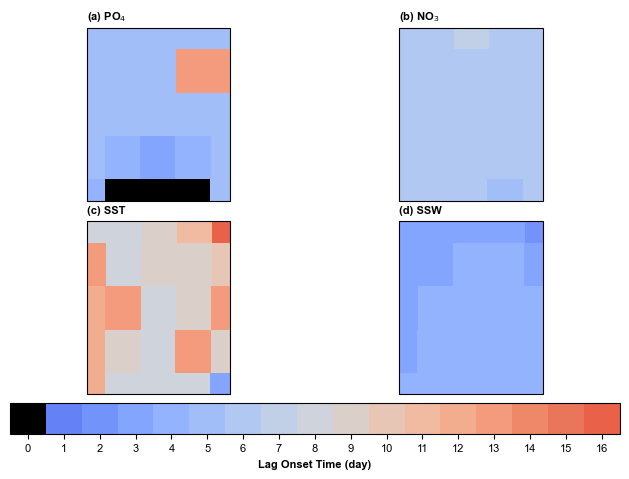

In [ ]:
def plot_map(ax, data, title, cmap):
    ax.set_extent([2, 3, -41, -40], crs=ccrs.PlateCarree())
    ax.coastlines(color='black', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='lightgrey')
    mesh = ax.pcolormesh(Lon, Lat, data, transform=ccrs.PlateCarree(),
                         cmap=cmap, vmin=-0.5, vmax=16.5, shading='auto')
    ax.set_title(title, fontsize=8, fontweight='bold', loc='left', fontname='Arial')
    return mesh

colors = [
    (0,0,0),(100, 130, 245), (114, 147, 250), (131, 165, 254), (147, 179, 254),
    (162, 190, 249), (177, 200, 243), (193, 208, 231), (207, 211, 219),
    (219, 208, 201), (231, 198, 182), (240, 187, 160), (242, 173, 143),
    (244, 155, 125), (239, 136, 105), (233, 118, 91), (233, 97, 73)
]

colors = [tuple(c/255 for c in color) for color in colors]


cmap = plt.cm.colors.ListedColormap(colors)

colors_array = cmap(np.linspace(0, 1, 17))

custom_cmap = ListedColormap(colors_array)

fig, axes = plt.subplots(2, 2, subplot_kw={'projection': ccrs.Robinson()}, figsize=(7.09, 6.693))
meshes = []


datasets = [
    (PO4, '(a) PO$_4$'),
    (NO3, '(b) NO$_3$'),
    (SST, '(c) SST'),
    (SSW, '(d) SSW')
]


max_all = 0
for ax, (data, label) in zip(axes.ravel(), datasets):
    vmax = int(np.max(data))
    max_all = max(max_all, vmax)
    mesh = plot_map(ax, data, label, custom_cmap)
    meshes.append(mesh)

plt.subplots_adjust(left=0.07, right=0.93, top=0.96, bottom=0.3, hspace=0.12, wspace=0.05)


    


ticks = np.arange(0, 17, 1)
labels = [str(i) for i in range(0, 17)]

cbar = fig.colorbar(meshes[0], ax=axes, orientation='horizontal', shrink=1.0, pad=0.02)
cbar.set_ticks(ticks)
cbar.set_ticklabels(labels)
cbar.set_label('Lag Onset Time (day)', fontsize=8, fontweight='bold', fontname='Arial')
cbar.ax.tick_params(labelsize=8)
for tick in cbar.ax.get_xticklabels():
    tick.set_fontname('Arial')

## Please change the following paths to match your own file locations.
# plt.savefig('/Users/huasong/Desktop/zhihoukaishi_gamma.png', dpi=600, bbox_inches='tight')
plt.show()